In [16]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.utils import to_categorical


In [17]:
# Load and preprocess the MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.reshape((60000, 28 * 28)).astype('float32') / 255
x_test = x_test.reshape((10000, 28 * 28)).astype('float32') / 255

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)


In [18]:
# Create a simple neural network with dropout
model = Sequential()
model.add(Dense(128, activation='relu', input_dim=28 * 28))
model.add(Dropout(0.5))# 0.5 is the dropout rate
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))# 0.5 is the dropout rate
model.add(Dense(10, activation='softmax'))


In [20]:
# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history=model.fit(x_train, y_train, epochs=20, batch_size=128, validation_split=0.2)


Epoch 1/20
375/375 [==============================] - 3s 6ms/step - loss: 0.3314 - accuracy: 0.9073 - val_loss: 0.1633 - val_accuracy: 0.9543
Epoch 2/20
375/375 [==============================] - 3s 8ms/step - loss: 0.2865 - accuracy: 0.9199 - val_loss: 0.1472 - val_accuracy: 0.9592
Epoch 3/20
375/375 [==============================] - 4s 10ms/step - loss: 0.2543 - accuracy: 0.9292 - val_loss: 0.1348 - val_accuracy: 0.9628
Epoch 4/20
375/375 [==============================] - 2s 6ms/step - loss: 0.2287 - accuracy: 0.9365 - val_loss: 0.1333 - val_accuracy: 0.9628
Epoch 5/20
375/375 [==============================] - 2s 6ms/step - loss: 0.2145 - accuracy: 0.9406 - val_loss: 0.1214 - val_accuracy: 0.9668
Epoch 6/20
375/375 [==============================] - 2s 6ms/step - loss: 0.2024 - accuracy: 0.9433 - val_loss: 0.1206 - val_accuracy: 0.9678
Epoch 7/20
375/375 [==============================] - 2s 6ms/step - loss: 0.1966 - accuracy: 0.9452 - val_loss: 0.1145 - val_accuracy: 0.9674
Epoch

In [21]:
# Evaluate the model on the test set
loss, accuracy = model.evaluate(x_test, y_test)
print(f'Test accuracy: {accuracy * 100:.2f}%')

313/313 [==============================] - 1s 2ms/step - loss: 0.0949 - accuracy: 0.9741
Test accuracy: 97.41%


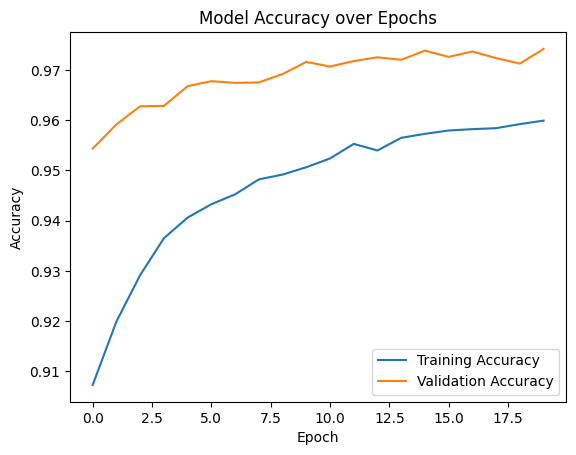

In [22]:
import matplotlib.pyplot as plt

# Your previous code for model training

# Plot training and validation accuracy over epochs
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()